In [59]:
print("Shivaya Namah")

Shivaya Namah


### Problem Statement.
- Create a sentiment analyzer machine learning model that predicts the emotion of customer feedback. It is for women's boutique shop.

## Loading the Dataset.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv(
    filepath_or_buffer = "./feedback.csv",
    low_memory = True
)
df

,feedback,sentiment
0,The fabric of the dress is absolutely stunning...,positive
1,Delivery was late and the color doesn't match ...,negative
2,I'm not entirely sure about the fitting—it’s n...,neutral
3,Beautiful embroidery work! I received so many ...,positive
4,"The sizing is way off. Ordered a medium, but i...",negative
...,...,...
1845,They don’t even match accessories well.,negative
1846,Suggestions were basic but helpful.,neutral
1847,The dupatta was the highlight—so gorgeous!,positive
1848,The dupatta color didn’t match the set.,negative


## Explore the dataset.

In [2]:
df.columns

Index(['feedback', 'sentiment'], dtype='object')

In [3]:
df.describe()

,feedback,sentiment
count,1850,1850
unique,1846,3
top,The attention to detail is unmatched!,neutral
freq,2,637


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feedback   1850 non-null   object
 1   sentiment  1850 non-null   object
dtypes: object(2)
memory usage: 29.0+ KB


In [5]:
df.shape

(1850, 2)

In [6]:
df.head().values

array([['The fabric of the dress is absolutely stunning, feels premium and looks elegant!',
        'positive'],
       ["Delivery was late and the color doesn't match the picture on the website.",
        'negative'],
       ["I'm not entirely sure about the fitting—it’s neither too loose nor too tight. Just okay.",
        'neutral'],
       ['Beautiful embroidery work! I received so many compliments at the event.',
        'positive'],
       ['The sizing is way off. Ordered a medium, but it fits like an extra small.',
        'negative']], dtype=object)

In [7]:
df.tail()

,feedback,sentiment
1845,They don’t even match accessories well.,negative
1846,Suggestions were basic but helpful.,neutral
1847,The dupatta was the highlight—so gorgeous!,positive
1848,The dupatta color didn’t match the set.,negative
1849,Dupatta was plain—not too flashy.,neutral


In [8]:
df["sentiment"]

0       positive
1       negative
2        neutral
3       positive
4       negative
          ...   
1845    negative
1846     neutral
1847    positive
1848    negative
1849     neutral
Name: sentiment, Length: 1850, dtype: object

In [9]:
df["feedback"]

0       The fabric of the dress is absolutely stunning...
1       Delivery was late and the color doesn't match ...
2       I'm not entirely sure about the fitting—it’s n...
3       Beautiful embroidery work! I received so many ...
4       The sizing is way off. Ordered a medium, but i...
                              ...                        
1845              They don’t even match accessories well.
1846                  Suggestions were basic but helpful.
1847           The dupatta was the highlight—so gorgeous!
1848              The dupatta color didn’t match the set.
1849                    Dupatta was plain—not too flashy.
Name: feedback, Length: 1850, dtype: object

### Explore Unique Values

In [10]:
df["feedback"].unique()

array(['The fabric of the dress is absolutely stunning, feels premium and looks elegant!',
       "Delivery was late and the color doesn't match the picture on the website.",
       "I'm not entirely sure about the fitting—it’s neither too loose nor too tight. Just okay.",
       ..., 'The dupatta was the highlight—so gorgeous!',
       'The dupatta color didn’t match the set.',
       'Dupatta was plain—not too flashy.'], shape=(1846,), dtype=object)

In [11]:
df["sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

### Check whether the dataset is balanced or not. 

In [12]:
df["sentiment"].value_counts()

sentiment
neutral     637
positive    619
negative    594
Name: count, dtype: int64

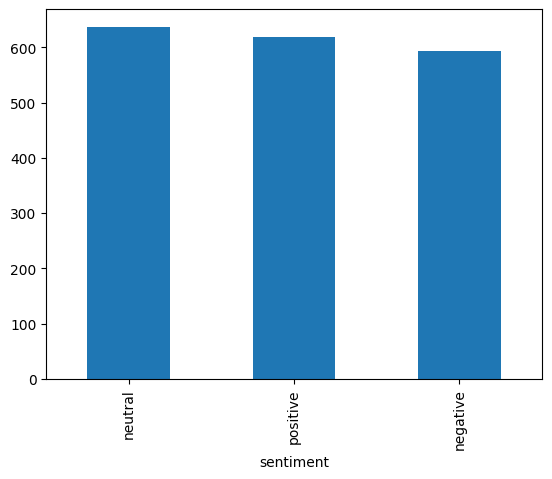

In [13]:
df["sentiment"].value_counts().plot(kind = "bar");

### Okay dataset is balanced and ready for training.

In [14]:
df.isna().sum()

feedback     0
sentiment    0
dtype: int64

### I dont have any null values in my dataset.

In [15]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [16]:
sentence_vec = model.encode("Loved the dress and the fit!")
sentence_vec

array([-7.21896961e-02,  1.02059707e-01,  3.17766815e-02, -8.38662032e-04,
        4.36533205e-02, -1.45379687e-02, -2.49537011e-03, -3.92323062e-02,
       -5.78323901e-02,  2.81534903e-02, -9.97454114e-03,  3.94754373e-02,
        3.73565853e-02, -1.12801969e-01, -1.46743143e-02,  2.43227128e-02,
       -3.14349681e-02,  7.35723553e-03,  2.57465634e-02, -2.42289957e-02,
       -1.06804699e-01, -3.84856425e-02,  6.24846071e-02,  8.17272142e-02,
       -6.20227978e-02, -4.01935615e-02,  6.69733807e-03,  5.92117645e-02,
       -5.04295081e-02, -6.25974685e-02, -2.04762407e-02,  3.14326137e-02,
        4.64189462e-02,  6.75056800e-02, -4.45129499e-02, -2.39755157e-02,
        7.32997581e-02, -1.06459148e-02, -1.75456196e-04,  7.46838301e-02,
       -2.59342492e-02,  3.22574191e-02, -1.21351881e-02,  6.51174039e-02,
       -1.16158267e-02,  2.30808128e-02,  6.79837465e-02, -1.78149287e-02,
       -4.18038554e-02,  8.20555836e-02,  7.30031030e-03,  3.77538577e-02,
       -1.06787998e-02, -

In [17]:
sentence_vec.shape

(384,)

In [18]:
len(sentence_vec)

384

In [19]:
model = SentenceTransformer("all-MiniLM-L6-v2")
def convert_text_to_vector(text: str) :
    return model.encode(text)

In [20]:
convert_text_to_vector("Hi")

array([-9.04761776e-02,  4.04396281e-02,  2.39056237e-02,  5.89480214e-02,
       -2.28823498e-02, -4.72201183e-02,  4.50475700e-02,  1.57863628e-02,
       -4.81995009e-02, -3.77941132e-02, -1.90775711e-02,  2.13088002e-02,
       -4.68304660e-03, -4.33081649e-02,  5.99147864e-02,  5.91033846e-02,
       -2.80367453e-02, -5.92183620e-02, -1.24403156e-01, -3.55999842e-02,
       -6.08051708e-03,  3.24290842e-02, -3.78007479e-02,  2.47109886e-02,
       -4.27243710e-02, -4.24539037e-02,  4.59356457e-02,  9.86255631e-02,
       -4.99980338e-02, -3.52358520e-02,  7.08397329e-02,  3.31632197e-02,
        2.65883040e-02,  1.73252949e-04,  3.88168474e-03,  3.04672420e-02,
       -7.82026127e-02, -1.20379508e-01,  1.80415064e-02,  2.28290763e-02,
       -1.77500572e-03, -2.34498121e-02,  3.05812457e-03,  2.43557002e-02,
        4.41540703e-02, -4.01097015e-02,  2.01922990e-02,  1.08881583e-02,
        2.87315156e-02,  1.23677636e-02, -9.13190991e-02, -6.81244358e-02,
        6.19150186e-03, -

In [21]:
df["vectorized_feedback"] = df["feedback"].apply(convert_text_to_vector)
df

,feedback,sentiment,vectorized_feedback
0,The fabric of the dress is absolutely stunning...,positive,"[-0.059351187, 0.035945814, 0.032352827, 0.035..."
1,Delivery was late and the color doesn't match ...,negative,"[0.00361357, 0.065664425, 0.06607931, 0.019805..."
2,I'm not entirely sure about the fitting—it’s n...,neutral,"[-0.055607133, 0.032289833, -0.0034601933, -0...."
3,Beautiful embroidery work! I received so many ...,positive,"[-0.07426239, 0.101096235, 0.06826606, -0.0006..."
4,"The sizing is way off. Ordered a medium, but i...",negative,"[0.04322683, 0.06531873, 0.07866674, 0.0576796..."
...,...,...,...
1845,They don’t even match accessories well.,negative,"[-0.07756949, 0.06509499, 0.02586996, -0.04079..."
1846,Suggestions were basic but helpful.,neutral,"[0.005647405, 0.018702732, 0.047645617, 0.0284..."
1847,The dupatta was the highlight—so gorgeous!,positive,"[-0.027593406, 0.0687305, 0.01832691, -0.05874..."
1848,The dupatta color didn’t match the set.,negative,"[-0.01659913, 0.08802268, 0.004978383, -0.0528..."


## Splitting the Dataset into Train and test.

In [22]:
from sklearn.model_selection import train_test_split

X = df["vectorized_feedback"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.33,
    random_state = 42,
    shuffle = True,
)

In [23]:
X_train.head()

177     [-0.02347652, -0.03786864, 0.013833136, -0.086...
1792    [-0.0022451456, -0.03375515, -0.006744502, 0.0...
618     [-0.038311567, 0.03755973, 0.04461812, -0.0507...
86      [0.038600173, 0.038187824, 0.07187177, 0.06044...
1302    [-0.043279033, 0.029195003, 0.032323923, 0.084...
Name: vectorized_feedback, dtype: object

## Initializing the Classifier Algorithm

In [24]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


### Train the train dataset.

In [25]:
X_train.tolist()[:10]

[array([-2.34765206e-02, -3.78686413e-02,  1.38331363e-02, -8.65011811e-02,
        -1.69348381e-02, -5.53018972e-02,  2.40989178e-02,  1.11471459e-01,
         7.73892924e-03, -7.06280814e-03, -4.52907458e-02,  6.94688931e-02,
        -2.86048241e-02,  1.87472925e-02,  1.33643067e-02,  2.04220861e-02,
         1.43517584e-01, -1.50494009e-01,  5.10685444e-02, -1.84392277e-02,
         5.94813435e-04,  1.40602263e-02,  2.17042435e-02, -3.98717076e-02,
         1.71006452e-02, -2.53498200e-02,  5.76312281e-03,  2.07251832e-02,
        -4.41854931e-02, -1.07857352e-03, -3.45835350e-02,  7.59283453e-02,
        -3.50584909e-02, -1.79600753e-02, -1.06085306e-02,  1.02771781e-01,
         6.05978742e-02,  2.77380329e-02, -1.61291361e-02, -1.73999257e-02,
        -1.96985193e-02, -3.54418829e-02,  3.85419186e-03,  7.41865262e-02,
         3.16203609e-02, -4.47103754e-02, -3.20780799e-02, -5.24677373e-02,
         1.48068357e-03, -7.61777684e-02, -5.19244596e-02, -9.76011753e-02,
        -1.5

In [26]:
clf.fit(X_train.tolist(), y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [27]:
clf.predict([["hi"]])

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [28]:
def predict(text: str):
    vectorized_text = model.encode(text)
    prediction = clf.predict([vectorized_text])
    return prediction[0]

In [29]:
predict("This dresses perfectly fit for me")

'positive'

In [30]:
predict("I never go to this shop again.")

'negative'

In [31]:
predict("Ahhh that okay, the dresses is okay")

'neutral'

In [32]:
y_pred = clf.predict(X_test.tolist())
y_pred

array(['neutral', 'negative', 'positive', 'neutral', 'negative',
       'neutral', 'positive', 'positive', 'neutral', 'neutral', 'neutral',
       'positive', 'negative', 'positive', 'negative', 'neutral',
       'negative', 'positive', 'neutral', 'neutral', 'negative',
       'negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral',
       'negative', 'neutral', 'negative', 'positive', 'positive',
       'negative', 'positive', 'neutral', 'positive', 'positive',
       'negative', 'neutral', 'negative', 'positive', 'neutral',
       'positive', 'positive', 'negative', 'negative', 'neutral',
       'neutral', 'positive', 'positive', 'neutral', 'neutral', 'neutral',
       'negative', 'neutral', 'positive', 'positive', 'neutral',
       'neutral', 'neutral', 'negative', 'negative', 'negative',
       'positive', 'positive', 'neutral', 'neutral', 'neutral',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'neutral', 'neutral', 'neutral', 'po

In [33]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

round(accuracy_score(y_test, y_pred) * 100)

91

In [34]:
balanced_accuracy_score(y_test, y_pred)

0.9130834320988357

In [35]:
print(classification_report(y_test, y_pred))
#precision:how many selected items are relevant(It measures how many of the items predicted
#  as positive are actually positive.)
#recall:how may relevant items are selected
#f1score:The harmonic mean of precision and recall
#support:The number of actual accurences of each class in dataset

              precision    recall  f1-score   support

    negative       0.89      0.92      0.91       196
     neutral       0.88      0.89      0.88       201
    positive       0.97      0.93      0.95       214

    accuracy                           0.91       611
   macro avg       0.91      0.91      0.91       611
weighted avg       0.91      0.91      0.91       611



In [36]:
print(predict("I wanted elegance. Got disappointment wrapped in plastic."))

negative


In [37]:
print(predict("Looks fine in natural light, less so indoors"))

neutral


In [38]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

In [39]:
clf

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None
